# Project Scope
Using online votes ranking 85 types of candy, your task is to find the 3 treats you'll give out on Halloween to guarantee that trick-or-treaters of all tastes find something they'll love and present the data to back up your decision.

# Load Libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Standardize data
from sklearn.preprocessing import StandardScaler

# KMeans
from sklearn.cluster import KMeans

# Hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

# DBSCAN
from sklearn.cluster import DBSCAN

# Silhouette Score
from sklearn.metrics import silhouette_score

# counter
from collections import Counter

# PCA
from sklearn.decomposition import PCA

# t-SNE
from sklearn.manifold import TSNE

# Data Prep and EDA

### a. Load data and check for data types

In [2]:
# Read in the candy data csv file
candy_raw = pd.read_csv("candy-data.csv")
candy_raw.head()

competitorname  chocolate  fruity  caramel  peanutyalmondy  nougat  \
0      100 Grand          1       0        1               0       0   
1   3 Musketeers          1       0        0               0       1   
2       One dime          0       0        0               0       0   
3    One quarter          0       0        0               0       0   
4      Air Heads          0       1        0               0       0   

   crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
0                 1     0    1         0         0.732         0.860   
1                 0     0    1         0         0.604         0.511   
2                 0     0    0         0         0.011         0.116   
3                 0     0    0         0         0.011         0.511   
4                 0     0    0         0         0.906         0.511   

   winpercent  
0   66.971725  
1   67.602936  
2   32.261086  
3   46.116505  
4   52.341465

In [3]:
# Determine shape of candy data
candy_raw.shape

(85, 13)

In [4]:
# Check for data types and null values
candy_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [5]:
# Check numeric data statistics
candy_raw.describe()

chocolate     fruity    caramel  peanutyalmondy     nougat  \
count  85.000000  85.000000  85.000000       85.000000  85.000000   
mean    0.435294   0.447059   0.164706        0.164706   0.082353   
std     0.498738   0.500140   0.373116        0.373116   0.276533   
min     0.000000   0.000000   0.000000        0.000000   0.000000   
25%     0.000000   0.000000   0.000000        0.000000   0.000000   
50%     0.000000   0.000000   0.000000        0.000000   0.000000   
75%     1.000000   1.000000   0.000000        0.000000   0.000000   
max     1.000000   1.000000   1.000000        1.000000   1.000000   

       crispedricewafer       hard        bar   pluribus  sugarpercent  \
count         85.000000  85.000000  85.000000  85.000000     85.000000   
mean           0.082353   0.176471   0.247059   0.517647      0.478647   
std            0.276533   0.383482   0.433861   0.502654      0.282778   
min            0.000000   0.000000   0.000000   0.000000      0.011000   
25%            0.000000   0.000000   0.000000   0.000000      0.220000   
50%            0.000000   0.000000   0.000000   1.000000      0.465000   
75%            0.000000   0.000000   0.000000   1.000000      0.732000   
max            1.000000   1.000000   1.000000   1.000000      0.988000   

       pricepercent  winpercent  
count     85.000000   85.000000  
mean       0.468882   50.316764  
std        0.285740   14.714357  
min        0.011000   22.445341  
25%        0.255000   39.141056  
50%        0.465000   47.829754  
75%        0.651000   59.863998  
max        0.976000   84.180290

In [6]:
# Checking granularity (competitorname column)
candy_raw["competitorname"].nunique()

85

### b. Data Prep: Check for null data and any required data conversions

In [7]:
# Checking for null values
candy_raw[candy_raw.isna().any(axis=1)]

Empty DataFrame
Columns: [competitorname, chocolate, fruity, caramel, peanutyalmondy, nougat, crispedricewafer, hard, bar, pluribus, sugarpercent, pricepercent, winpercent]
Index: []

### c. EDA

Our goal is to find the **3 treats** you'll give out on Halloween to guarantee that trick-or-treaters 
of **all tastes** find something they'll love and present the data to back up your decision.

### d. Data Prep: Prepare input for model

In [8]:
# Remember the name competitorname column
candy_names = candy_raw['competitorname']
candy_names

0                      100 Grand
1                   3 Musketeers
2                       One dime
3                    One quarter
4                      Air Heads
                 ...            
80                     Twizzlers
81                      Warheads
82          Welch's Fruit Snacks
83    Werther's Original Caramel
84                      Whoppers
Name: competitorname, Length: 85, dtype: object

In [9]:
# Remove the competitorname column for modeling
df_clean = candy_raw.iloc[:, 1:]
df_clean.head()

chocolate  fruity  caramel  peanutyalmondy  nougat  crispedricewafer  hard  \
0          1       0        1               0       0                 1     0   
1          1       0        0               0       1                 0     0   
2          0       0        0               0       0                 0     0   
3          0       0        0               0       0                 0     0   
4          0       1        0               0       0                 0     0   

   bar  pluribus  sugarpercent  pricepercent  winpercent  
0    1         0         0.732         0.860   66.971725  
1    1         0         0.604         0.511   67.602936  
2    0         0         0.011         0.116   32.261086  
3    0         0         0.011         0.511   46.116505  
4    0         0         0.906         0.511   52.341465

In [10]:
# Note the number of rows and columns
df_clean.shape

(85, 12)

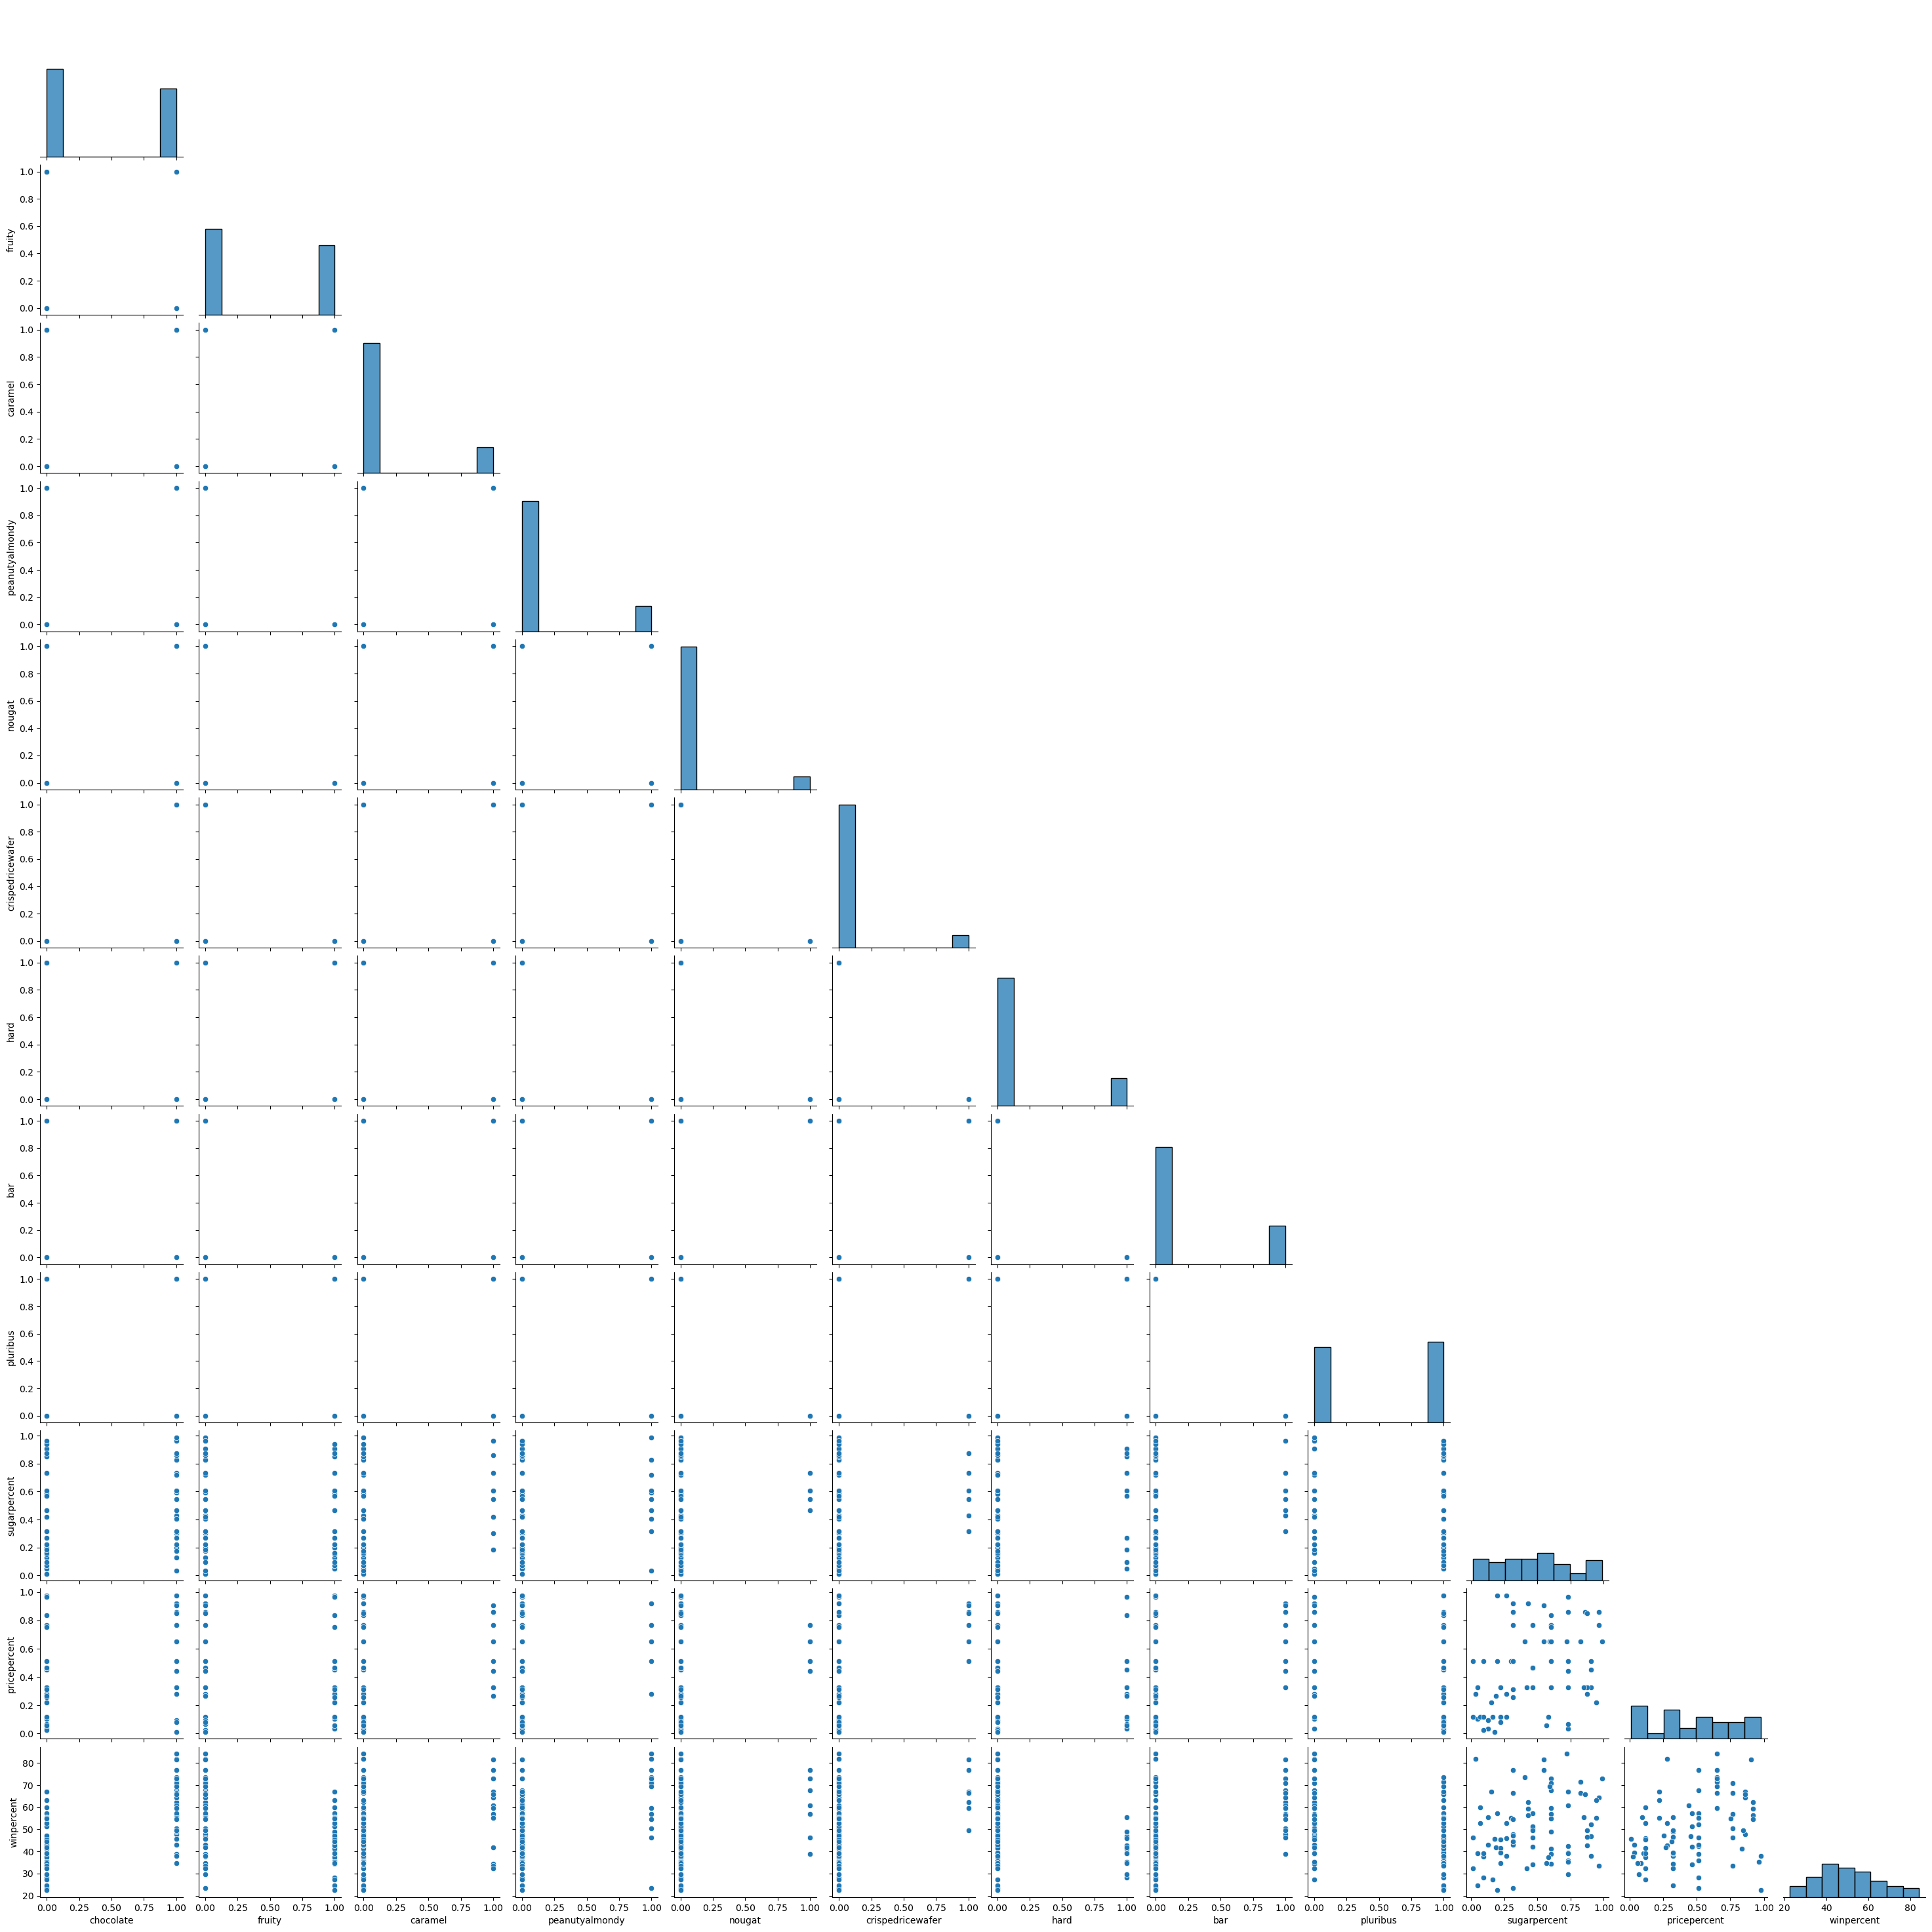

In [11]:
# Run a pair plot to understand variable relationships
fig, figsize=(8,8)
sns.pairplot(df_clean, corner=True);

#### Observations
* Two value columns are perfectly correlated.  
* No strong correlation on winpercent with sugarpercent and price percent

## 2. KMeans Clustering

Segment the different candies using K-Means Clustering

### a. Standardize the data

In [12]:
# scale the data using standardization
std_scaler = StandardScaler()
standardize = std_scaler.fit_transform(df_clean)
df_scaled = pd.DataFrame(standardize, columns=df_clean.columns)
df_scaled.head()

chocolate    fruity   caramel  peanutyalmondy    nougat  crispedricewafer  \
0   1.138990 -0.899172  2.251983       -0.444053 -0.299572          3.338092   
1   1.138990 -0.899172 -0.444053       -0.444053  3.338092         -0.299572   
2  -0.877971 -0.899172 -0.444053       -0.444053 -0.299572         -0.299572   
3  -0.877971 -0.899172 -0.444053       -0.444053 -0.299572         -0.299572   
4  -0.877971  1.112134 -0.444053       -0.444053 -0.299572         -0.299572   

      hard       bar  pluribus  sugarpercent  pricepercent  winpercent  
0 -0.46291  1.745743  -1.03594      0.901261      1.376914    1.138603  
1 -0.46291  1.745743  -1.03594      0.445922      0.148273    1.181755  
2 -0.46291 -0.572822  -1.03594     -1.663576     -1.242308   -1.234361  
3 -0.46291 -0.572822  -1.03594     -1.663576      0.148273   -0.287147  
4 -0.46291 -0.572822  -1.03594      1.520236      0.148273    0.138417

In [13]:
# Double check means for each column are around 0 and the standard deviation is around 1
df_scaled.describe()

chocolate        fruity       caramel  peanutyalmondy        nougat  \
count  8.500000e+01  8.500000e+01  8.500000e+01    8.500000e+01  8.500000e+01   
mean  -4.963350e-17 -7.836868e-18  3.918434e-18    2.742904e-17  1.306145e-17   
std    1.005935e+00  1.005935e+00  1.005935e+00    1.005935e+00  1.005935e+00   
min   -8.779711e-01 -8.991722e-01 -4.440530e-01   -4.440530e-01 -2.995723e-01   
25%   -8.779711e-01 -8.991722e-01 -4.440530e-01   -4.440530e-01 -2.995723e-01   
50%   -8.779711e-01 -8.991722e-01 -4.440530e-01   -4.440530e-01 -2.995723e-01   
75%    1.138990e+00  1.112134e+00 -4.440530e-01   -4.440530e-01 -2.995723e-01   
max    1.138990e+00  1.112134e+00  2.251983e+00    2.251983e+00  3.338092e+00   

       crispedricewafer          hard           bar      pluribus  \
count      8.500000e+01  8.500000e+01  8.500000e+01  8.500000e+01   
mean       2.612289e-17 -6.857260e-17 -5.224579e-17 -1.280022e-16   
std        1.005935e+00  1.005935e+00  1.005935e+00  1.005935e+00   
min       -2.995723e-01 -4.629100e-01 -5.728220e-01 -1.035940e+00   
25%       -2.995723e-01 -4.629100e-01 -5.728220e-01 -1.035940e+00   
50%       -2.995723e-01 -4.629100e-01 -5.728220e-01  9.653073e-01   
75%       -2.995723e-01 -4.629100e-01 -5.728220e-01  9.653073e-01   
max        3.338092e+00  2.160247e+00  1.745743e+00  9.653073e-01   

       sugarpercent  pricepercent    winpercent  
count  8.500000e+01  8.500000e+01  8.500000e+01  
mean   5.224579e-17  1.097162e-16 -6.591949e-16  
std    1.005935e+00  1.005935e+00  1.005935e+00  
min   -1.663576e+00 -1.611956e+00 -1.905407e+00  
25%   -9.200934e-01 -7.529642e-01 -7.640179e-01  
50%   -4.854709e-02 -1.366766e-02 -1.700224e-01  
75%    9.012605e-01  6.411379e-01  6.526887e-01  
max    1.811937e+00  1.785287e+00  2.315052e+00

In [14]:
# Fit models with 2 - 15 clusters and capture the inertia and silhouette scores

# create an empty list to hold many inertia values
inertia_values_scaled = []
silhoulette_scores = []

# create 2 - 15 clusters, and add the intertia scores to the list
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    inertia_values_scaled.append(kmeans.inertia_)
    silhoulette_scores.append(silhouette_score(df_scaled, kmeans.labels_, metric='euclidean', sample_size=None))

C:\Users\imh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\imh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\imh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\imh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with M

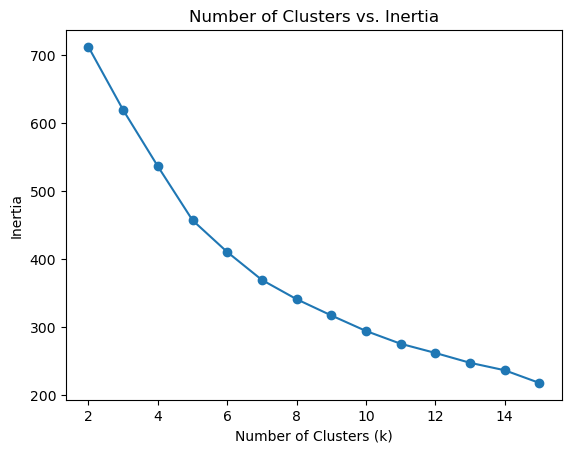

In [15]:
# plot the inertia values

# turn the list into a series for plotting
inertia_series = pd.Series(inertia_values_scaled, index=range(2, 16))

# plot the data
inertia_series.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Number of Clusters vs. Inertia");

### b. Identify a k value with a high silhouette score

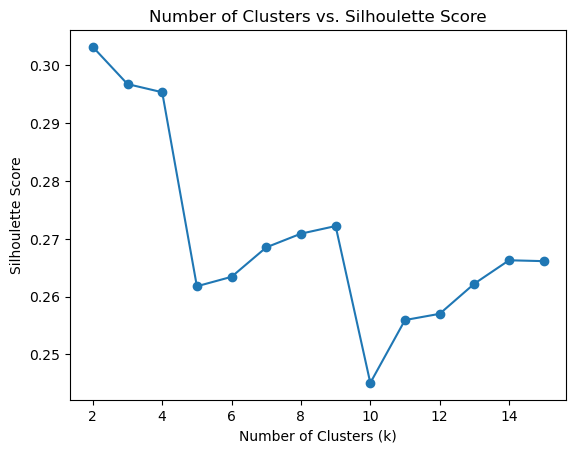

In [16]:
# plot the silhouette scores

# turn the list into a series for plotting
silhoulette_series = pd.Series(silhoulette_scores, index=range(2, 16))

# plot the data
silhoulette_series.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhoulette Score")
plt.title("Number of Clusters vs. Silhoulette Score");

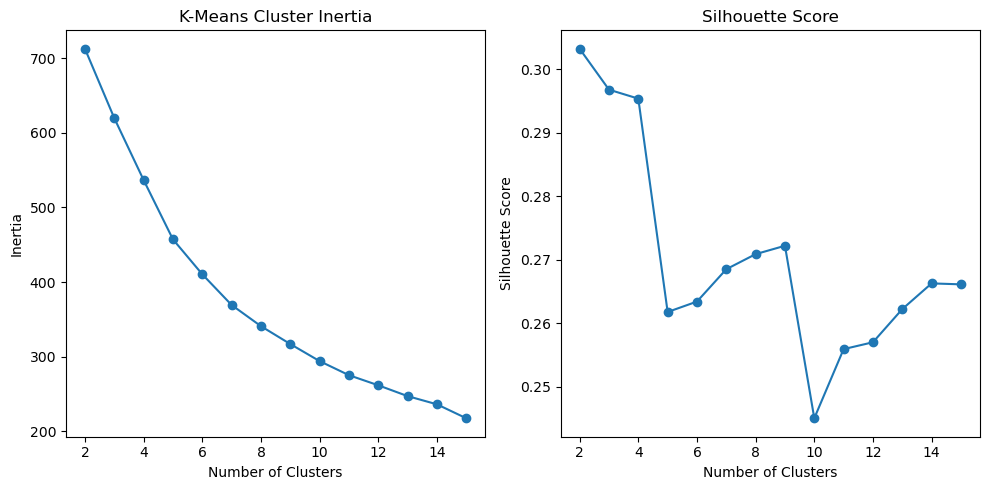

In [17]:
# Display the inertia plot and silhouette scores side by side for presentation

n_clusters = range(2, 16)

fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])  # 1 row, 2 columns

# Inertia plot (left)
ax0 = plt.subplot(gs[0])
line_inertia, = ax0.plot(n_clusters, inertia_series, marker='o')
ax0.set_title('K-Means Cluster Inertia')
ax0.set_xlabel('Number of Clusters')
ax0.set_ylabel('Inertia')

# Get the color from the inertia plot
inertia_color = line_inertia.get_color()

# Silhouette plot (right)
ax1 = plt.subplot(gs[1])
ax1.plot(n_clusters, silhoulette_series, marker='o', color=inertia_color)
ax1.set_title('Silhouette Score')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Silhouette Score')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show();

In [18]:
# fit a kmeans model for the k value that you identified (3 clusters)

kmeans3 = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans3.fit(df_scaled)

C:\Users\imh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=10, random_state=42)

In [19]:
# Determine the number of candy items in each cluster
Counter(kmeans3.labels_)

Counter({0: 51, 2: 27, 1: 7})

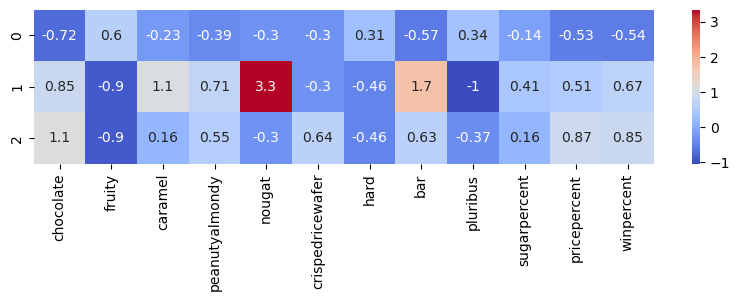

In [20]:
# create a heat map of the cluster centers
cluster_centers3 = pd.DataFrame(kmeans3.cluster_centers_, columns=df_scaled.columns)

# Create a heatmap
plt.figure(figsize=(10,2))
sns.heatmap(cluster_centers3, annot=True, cmap="coolwarm");

#### Interpret the clusters

* Cluster 0: Fruity, pluribus, hard
* Cluster 1: Candy bar with nougat and caramel
* Cluster 2: Chocolate, wafer / nutty taste

## 3. PCA

Visualize the data with PCA

### a. Fit a PCA model with two (2) components

In [21]:
# fit a PCA model with 3 components for 3 clusters

pca2 = PCA(n_components=2)
pca2.fit(df_scaled)

PCA(n_components=2)

In [22]:
# view the explained variance ratio
pca2.explained_variance_ratio_

array([0.36010023, 0.10788813])

In [23]:
# view the components
pca2.components_

array([[ 0.40194658, -0.36838835,  0.22997091,  0.24071554,  0.22681016,
         0.2215182 , -0.21115871,  0.39474327, -0.26000415,  0.1083088 ,
         0.32073612,  0.32980351],
       [-0.2140416 ,  0.18304666,  0.40349894, -0.22446919,  0.47016599,
        -0.09719527,  0.43262603,  0.22255618, -0.36920922,  0.23647379,
        -0.05883628, -0.21115347]])

In [24]:
# View the columns

df_scaled.columns

Index(['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat',
       'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

#### Component interpretation
* Component 1: <-- More Fruity | More Chocolate, bar -->
* Component 2: <-- Less peanuty/almondy, less chocolate | More Nougat, Caramel, hard -->

### b. Overlay the K-Means cluster colors

In [25]:
# transform the dat"
df_scaled_transformed = pd.DataFrame(pca2.transform(df_scaled), columns=["PC1", "PC2"])
df_scaled_transformed.head()

PC1       PC2
0  3.842532  0.597102
1  2.812617  1.528625
2 -1.209721 -0.172832
3 -0.451316 -0.454656
4 -0.707071  0.576536

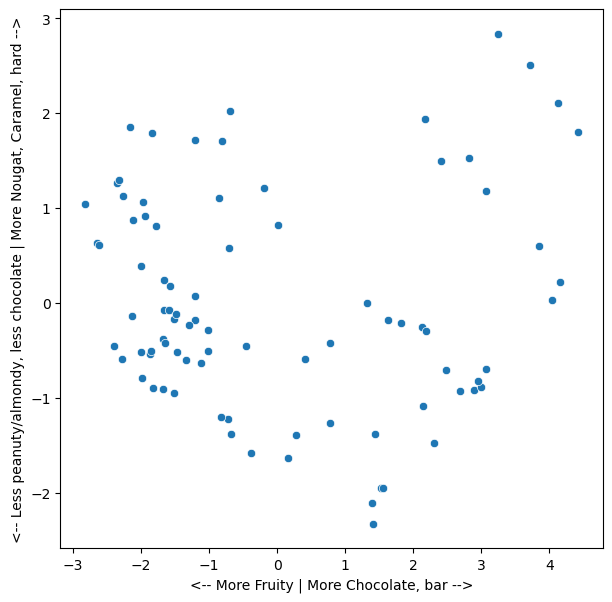

In [26]:
# plot the data

plt.figure(figsize=(7,7))
sns.scatterplot(x='PC1', y='PC2', data=df_scaled_transformed)
plt.xlabel('<-- More Fruity | More Chocolate, bar -->')
plt.ylabel('<-- Less peanuty/almondy, less chocolate | More Nougat, Caramel, hard -->');

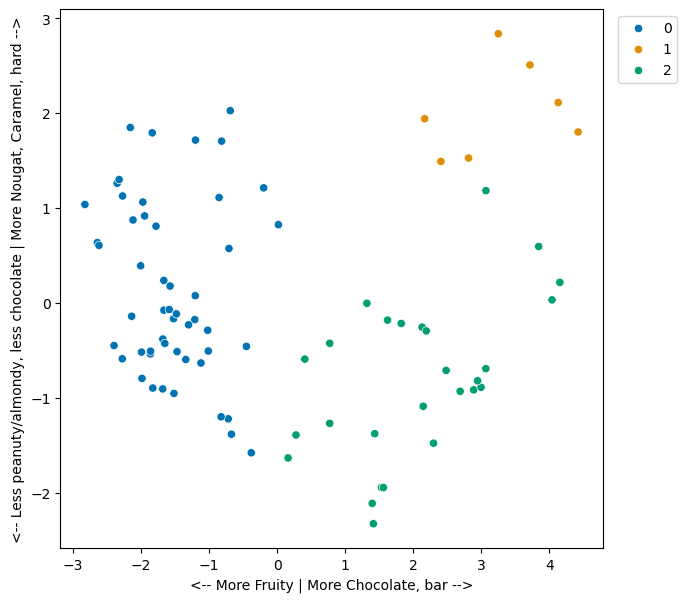

In [27]:
# plot the data
plt.figure(figsize=(7,7))

(sns.scatterplot(x='PC1', 
                 y='PC2', 
                 data=df_scaled_transformed,
                 hue=kmeans3.labels_,
                 palette="colorblind")
)
plt.xlabel('<-- More Fruity | More Chocolate, bar -->')
plt.ylabel('<-- Less peanuty/almondy, less chocolate | More Nougat, Caramel, hard -->')
plt.legend(bbox_to_anchor=(1.15,1));

### c. Create a 3D Plot

In [28]:
# fit a PCA model with 3 components

pca3 = PCA(n_components=3)
pca3.fit(df_scaled)

PCA(n_components=3)

In [29]:
# view the explained variance ratio

pca3.explained_variance_ratio_

array([0.36010023, 0.10788813, 0.1025251 ])

In [30]:
# view the components
pca3.components_

array([[ 0.40194658, -0.36838835,  0.22997091,  0.24071554,  0.22681016,
         0.2215182 , -0.21115871,  0.39474327, -0.26000415,  0.1083088 ,
         0.32073612,  0.32980351],
       [-0.2140416 ,  0.18304666,  0.40349894, -0.22446919,  0.47016599,
        -0.09719527,  0.43262603,  0.22255618, -0.36920922,  0.23647379,
        -0.05883628, -0.21115347],
       [-0.01601358,  0.13765612,  0.13294166, -0.18272802, -0.33970244,
         0.36485542,  0.20295368, -0.10696092,  0.26813772,  0.65509692,
         0.33048843,  0.13531766]])

In [31]:
# view the columns

df_scaled.columns

Index(['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat',
       'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

#### Component interpretation
* Component 1: <-- More Fruity, hard & pluribus | More Chocolate, bar -->
* Component 2: <-- Less peanuty/almondy, less chocolate | More Nougat, Caramel -->
* Component 3: <-- Less nougat  | More sweet, crispedricewafer -->

In [32]:
# transform the data
df_scaled_transformed3 = pd.DataFrame(pca3.transform(df_scaled), columns=["PC1", "PC2", "PC3"])
df_scaled_transformed3.head()

PC1       PC2       PC3
0  3.842532  0.597102  2.199284
1  2.812617  1.528625 -1.420580
2 -1.209721 -0.172832 -2.073001
3 -0.451316 -0.454656 -1.485255
4 -0.707071  0.576536  0.934905

In [33]:
# create a 3d scatter plot

# combine the data and cluster labels
cluster_labels = pd.Series(kmeans3.labels_, name='cluster')

# create a clean dataframe
df_clean = pd.concat([df_scaled_transformed3, cluster_labels], axis=1)

# create a 3d scatter plot
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)
fig.add_axes(ax)

# specify the data and labels
sc = (ax.scatter(df_clean['PC1'], 
                 df_clean['PC2'], 
                 df_clean['PC3'],
                 c=df_clean['cluster'],
                 cmap='tab10'))

# Format chart
ax.set_xlabel('<-- More Fruity, hard & pluribus | More Chocolate, bar -->')
ax.set_ylabel('<-- Less peanuty/almondy, less chocolate | More Nougat, Caramel -->')
ax.set_zlabel('<-- Less nougat  | More sweet, crispedricewafer -->')

# add a legend
plt.legend(*sc.legend_elements(), title='clusters',
           bbox_to_anchor=(1.2, .8));

#### Clusters

* Component 0: More Chocolate, bar
* Component 1: More Nougat, Caramel
* Component 2: More sweet, crispedricewafer

In [34]:
# Create a plotly plot

import plotly.graph_objects as go

# Create a Plotly scatter plot with labels
fig = go.Figure()

# Scatter plot trace
scatter_trace = go.Scatter(
    x=df_clean['PC1'],
    y=df_clean['PC2'],
    mode='markers',
    marker=dict(color='blue', size=10),
    text=candy_raw['competitorname'],  # Labels for hover
)

# Add trace to the figure
fig.add_trace(scatter_trace)

# Add data labels using annotations
for i, label in enumerate(candy_raw['competitorname']):
    fig.add_annotation(
        x=df_clean['PC1'].iloc[i],
        y=df_clean['PC2'].iloc[i],
        text=label,
        showarrow=False,
        xanchor='left',
        xshift=5,
        font=dict(color='black', size=10),
    )

# Update layout with axis labels
fig.update_layout(
    title='Comparing Candy by Candy Content',
    xaxis=dict(title='<-- More Fruity | More Chocolate, bar -->'),
    yaxis=dict(title='<-- Less peanuty/almondy, less chocolate | More Nougat, Caramel, hard -->'),
    height=650,
    width=800,
)

# Show the interactive plot
fig.show()

### Create Hierarchical Clustering model for the candy data

In [35]:
df_scaled.head()

chocolate    fruity   caramel  peanutyalmondy    nougat  crispedricewafer  \
0   1.138990 -0.899172  2.251983       -0.444053 -0.299572          3.338092   
1   1.138990 -0.899172 -0.444053       -0.444053  3.338092         -0.299572   
2  -0.877971 -0.899172 -0.444053       -0.444053 -0.299572         -0.299572   
3  -0.877971 -0.899172 -0.444053       -0.444053 -0.299572         -0.299572   
4  -0.877971  1.112134 -0.444053       -0.444053 -0.299572         -0.299572   

      hard       bar  pluribus  sugarpercent  pricepercent  winpercent  
0 -0.46291  1.745743  -1.03594      0.901261      1.376914    1.138603  
1 -0.46291  1.745743  -1.03594      0.445922      0.148273    1.181755  
2 -0.46291 -0.572822  -1.03594     -1.663576     -1.242308   -1.234361  
3 -0.46291 -0.572822  -1.03594     -1.663576      0.148273   -0.287147  
4 -0.46291 -0.572822  -1.03594      1.520236      0.148273    0.138417

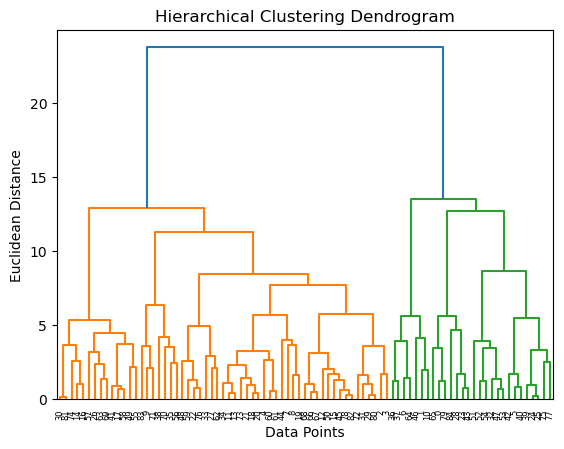

In [36]:
# visualize the clusters with a dendrogram

data = df_scaled

linkage_matrix = linkage(data, method='ward')
dendrogram_info = dendrogram(linkage_matrix)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance");

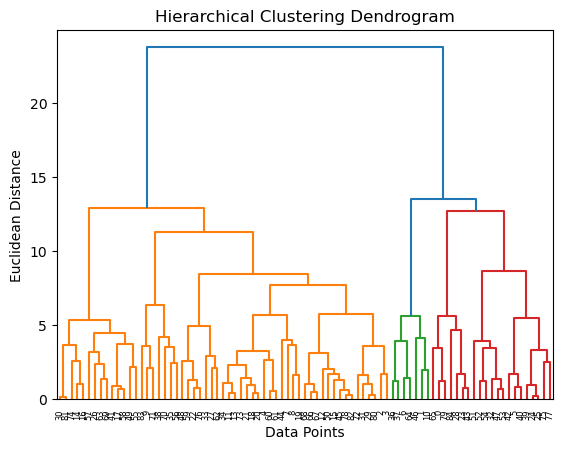

In [37]:
# visualize the clusters with a dendrogram with color_threshold = 10

data = df_scaled

linkage_matrix = linkage(data, method='ward')
dendrogram_info = dendrogram(linkage_matrix, color_threshold=13)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance");

In [38]:
# hierarchical clustering with sklearn, with 3 clusters

data = df_scaled

agg = AgglomerativeClustering(3)
agg.fit(data)

AgglomerativeClustering(n_clusters=3)

In [39]:
# view the 3 cluster labels
agg.labels_

array([1, 2, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 1, 1, 0, 1, 1,
       0, 0, 2, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1],
      dtype=int64)

In [40]:
# view the value counts

Counter(agg.labels_)

Counter({0: 57, 1: 21, 2: 7})

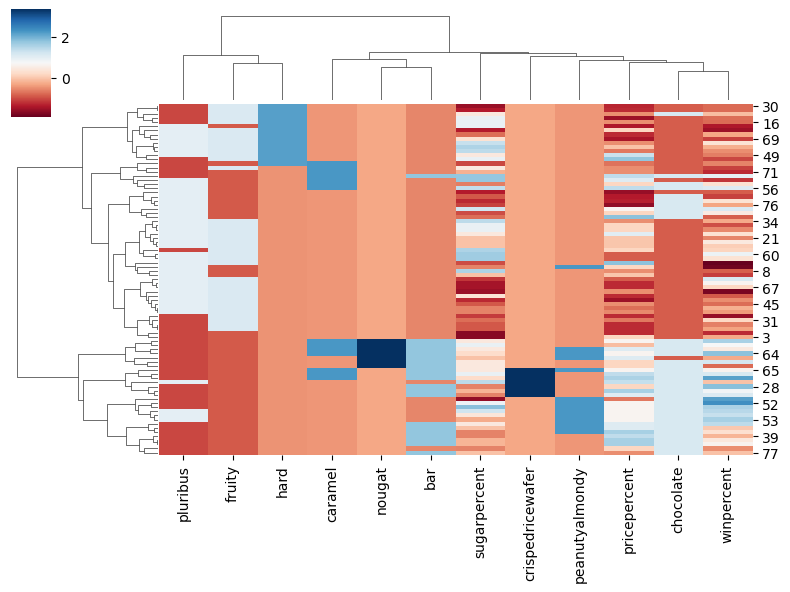

In [41]:
# create a cluster map

data = df_scaled

clustermap = sns.clustermap(data, method='ward', cmap='RdBu', figsize=(8, 6), xticklabels=data.columns)
plt.show()

#### Clusters

* Cluster 0: Fruity, pluribus, hard
* Cluster 1: Candy bar with nougat and caramel
* Cluster 2: Peanutty-almondy, Chocolate

In [42]:
# Update each row so that the mean in each row is 0 and standard deviation of each row is 1

# calculate the mean and standard deviation for each row
row_means = df_scaled.mean(axis=1)
row_stds = df_scaled.std(axis=1)

# Divide each element in the row by the standard deviation
data_zscore = df_scaled.sub(row_means, axis=0).div(row_stds, axis=0)
data_zscore.head()

chocolate    fruity   caramel  peanutyalmondy    nougat  crispedricewafer  \
0   0.299721 -1.190855  1.113691       -0.858011 -0.752348          1.907999   
1   0.601860 -0.988694 -0.633525       -0.633525  2.318011         -0.520774   
2  -0.201093 -0.249388  0.787345        0.787345  1.116464          1.116464   
3  -0.606808 -0.652252  0.323286        0.323286  0.632977          0.632977   
4  -0.988502  1.629278 -0.417727       -0.417727 -0.227677         -0.227677   

       hard       bar  pluribus  sugarpercent  pricepercent  winpercent  
0 -0.871802  0.743460 -1.290878      0.125862      0.473723    0.299438  
1 -0.648241  1.075363 -1.095426      0.061000     -0.171281    0.635234  
2  0.744390  0.494018 -0.560935     -1.990652     -1.031030   -1.012928  
3  0.282867  0.047273 -0.945409     -2.290734      1.592925    0.659610  
4 -0.442531 -0.587109 -1.196293      2.166094      0.361418    0.348453

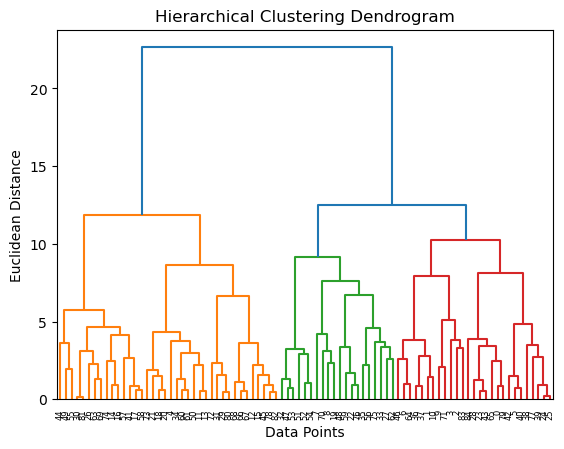

In [43]:
# Update the dendrogram using the data_zscore data
data = data_zscore

linkage_matrix = linkage(data, method='ward')
dendrogram_info_zscore = dendrogram(linkage_matrix, color_threshold=12)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show();

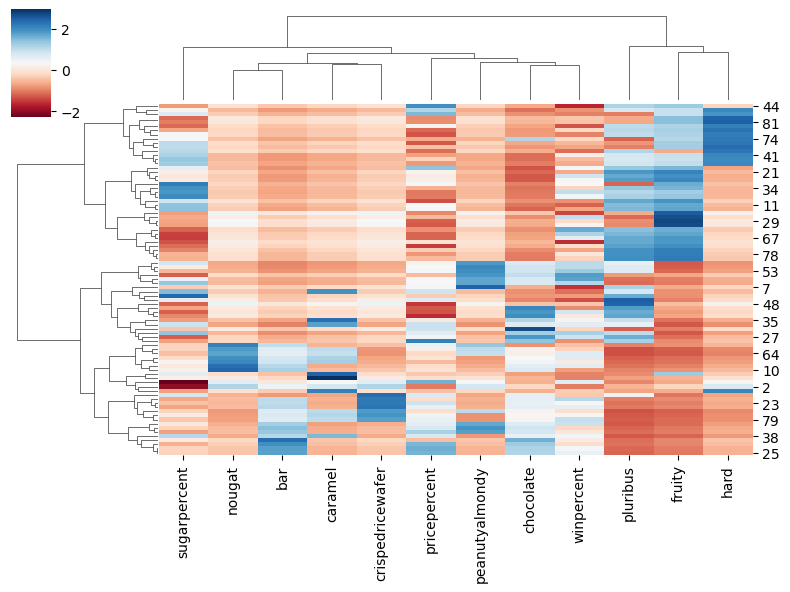

In [44]:
# Addws z_score =0 (scales data by row)
data = df_scaled
clustermap = sns.clustermap(data, method='ward', cmap='RdBu', figsize=(8, 6), xticklabels=data.columns, z_score=0)
plt.show()

In [45]:
# Check if the cluster map data points match the dendrogram
data_points = pd.Series(dendrogram_info["ivl"], name="Data Point").astype("int")
data_points.head()

0    30
1    81
2    74
3    14
4    16
Name: Data Point, dtype: int32

In [46]:
# Check if the cluster map data points match the dendrogram
data_points_zscore = pd.Series(dendrogram_info_zscore["ivl"], name="Data Point").astype("int")
data_points_zscore.head()

0    44
1    49
2    55
3    30
4    81
Name: Data Point, dtype: int32

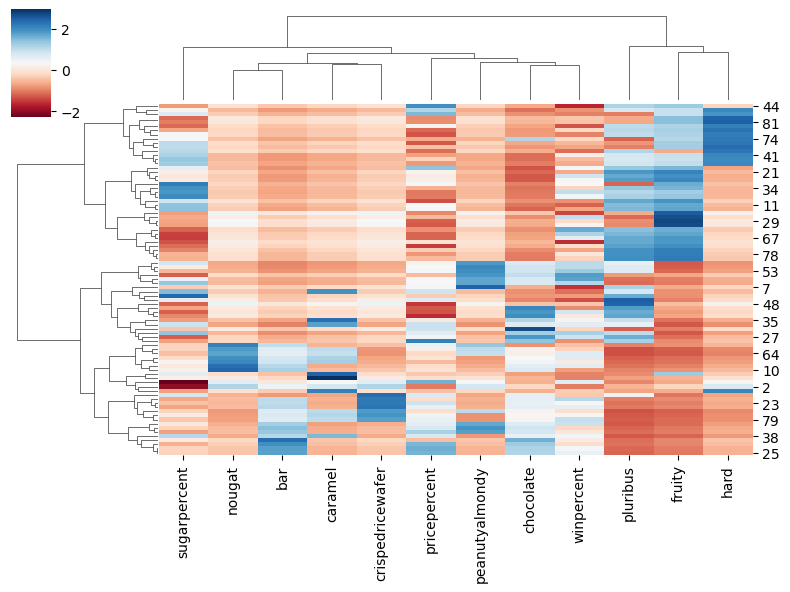

In [47]:
# Cluster Map 1 - Using df_scaled data with z_score = 0
data = df_scaled
clustermap = sns.clustermap(data, method='ward', cmap='RdBu', figsize=(8, 6), xticklabels=data.columns, z_score=0)
plt.show()

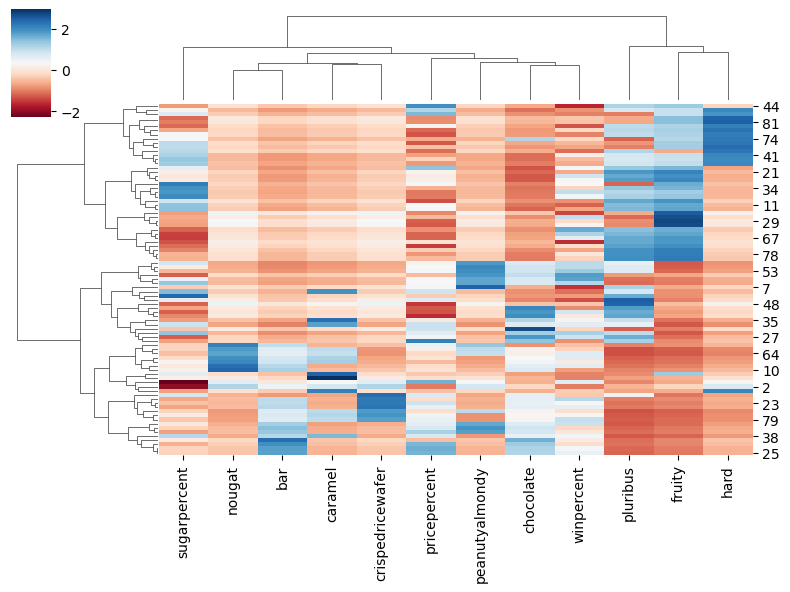

In [48]:
# Cluster Map 2 (Using data_zscore data and no z_score=0)
data = data_zscore
clustermap = sns.clustermap(data, method='ward', cmap='RdBu', figsize=(8, 6), xticklabels=data.columns)
plt.show()

### Cluster Map Interpretation
* Cluster 0: Fruity, Pluribus and Hard
* Cluster 1: Chocolate, peanuty / almondy
* Cluster 2: Nougat, caramel, wafer, chocolate, candy bar

In [49]:
# Update model with updated zscore data
data = data_zscore

agg3_zscore = AgglomerativeClustering(3)
agg3_zscore.fit(data)

AgglomerativeClustering(n_clusters=3)

In [50]:
Counter(agg3_zscore.labels_)

Counter({0: 38, 1: 27, 2: 20})

In [51]:
# View Silhouette Scores for 2 to 20 clusters

data = df_scaled
agg_silhouette_scores = {}

for n in range (2, 21):
    agg_n = AgglomerativeClustering(n)
    agg_n.fit(data)
    agg_ss = silhouette_score(data, agg_n.labels_, metric='euclidean', sample_size=None)
    agg_silhouette_scores[n] = agg_ss  # Append to the list

agg_silhouette_scores

{2: 0.29097294378887933,
 3: 0.29734224188916203,
 4: 0.21372218291326017,
 5: 0.23984187814036764,
 6: 0.27056053151490944,
 7: 0.27247156444791193,
 8: 0.26559838512214495,
 9: 0.24440961170656283,
 10: 0.2562116842112521,
 11: 0.24868242851708006,
 12: 0.2586306364638628,
 13: 0.25638798656779327,
 14: 0.2576602459091958,
 15: 0.26429533913299036,
 16: 0.26846589934699794,
 17: 0.2731485305539934,
 18: 0.2791094546159631,
 19: 0.28345776737364176,
 20: 0.2849492386060167}

In [52]:
# Fit a final Agglomerative Clustering model for 3 clusters
data = df_scaled

agg3 = AgglomerativeClustering(3)
agg3.fit(data)

Counter(agg3.labels_)

Counter({0: 57, 1: 21, 2: 7})

### t_SNE Plot

In [53]:
# create a tsne object
tsne = TSNE(n_components=2, random_state=42)

In [54]:
# fit a model and transform the data into a lower dimensionality space
data_tsne = tsne.fit_transform(df_clean)

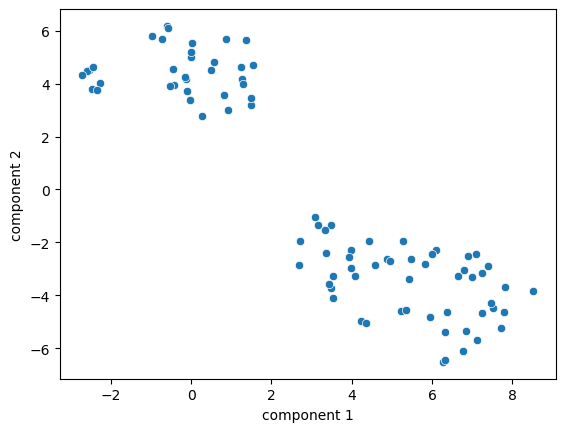

In [55]:
# plot the data
df_tsne = pd.DataFrame(data_tsne,
                       columns=['component 1','component 2'])

sns.scatterplot(x='component 1',
                y='component 2',
                data=df_tsne);

### DBSCAN Plot

In [56]:
# view the data (columns already on similar scales)
df_scaled.head()

chocolate    fruity   caramel  peanutyalmondy    nougat  crispedricewafer  \
0   1.138990 -0.899172  2.251983       -0.444053 -0.299572          3.338092   
1   1.138990 -0.899172 -0.444053       -0.444053  3.338092         -0.299572   
2  -0.877971 -0.899172 -0.444053       -0.444053 -0.299572         -0.299572   
3  -0.877971 -0.899172 -0.444053       -0.444053 -0.299572         -0.299572   
4  -0.877971  1.112134 -0.444053       -0.444053 -0.299572         -0.299572   

      hard       bar  pluribus  sugarpercent  pricepercent  winpercent  
0 -0.46291  1.745743  -1.03594      0.901261      1.376914    1.138603  
1 -0.46291  1.745743  -1.03594      0.445922      0.148273    1.181755  
2 -0.46291 -0.572822  -1.03594     -1.663576     -1.242308   -1.234361  
3 -0.46291 -0.572822  -1.03594     -1.663576      0.148273   -0.287147  
4 -0.46291 -0.572822  -1.03594      1.520236      0.148273    0.138417

In [57]:
# fit a dbscan model
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(df_clean)

DBSCAN()

In [58]:
# view the cluster assignments
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1, -1, -1,
       -1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1],
      dtype=int64)

In [59]:
# number of clusters in labels, ignoring noise points
n_clusters_ = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_clusters_

2

In [60]:
Counter(dbscan.labels_)

Counter({-1: 73, 0: 6, 1: 6})

In [61]:
# silhouette score of the model
from sklearn.metrics import silhouette_score

silhouette_score(df_clean, dbscan.labels_, metric='euclidean', sample_size=None)

-0.11702620637031146

In [62]:
data = df_clean
results = []

# define a range of eps and min_samples values to loop through
eps_values = np.arange(.1, 2, .1)
min_samples_values = np.arange(2, 10, 1)

# loop through the combinations of eps and min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(data)
        labels = dbscan.labels_
        
        # count the number of clusters (excluding noise points labeled as -1)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        
        # count the number of noise points (labeled as -1)
        n_noise = list(labels).count(-1)
        
        # calculate the silhouette score
        if n_clusters > 1:  # silhouette score requires at least 2 clusters
            silhouette = silhouette_score(data, labels, metric='euclidean', sample_size=None)
        else:
            silhouette = None
        
        results.append([eps, min_samples, n_clusters, n_noise, silhouette])

# put the results in a dataframe
dbscan_results = pd.DataFrame(results, columns=["Eps", "Min Samples", "Number of Clusters",
                                                "Number of Noise Points", "Silhouette Score"])
dbscan_results.head()

Eps  Min Samples  Number of Clusters  Number of Noise Points  \
0  0.1            2                   2                      81   
1  0.1            3                   0                      85   
2  0.1            4                   0                      85   
3  0.1            5                   0                      85   
4  0.1            6                   0                      85   

   Silhouette Score  
0         -0.433709  
1               NaN  
2               NaN  
3               NaN  
4               NaN

In [63]:
# view the silhouette scores (higher is better)
dbscan_results.sort_values('Silhouette Score', ascending=False)

Eps  Min Samples  Number of Clusters  Number of Noise Points  \
151  1.9            9                   2                       7   
144  1.9            2                   3                       0   
136  1.8            2                   3                       0   
138  1.8            4                   3                       0   
139  1.8            5                   3                       0   
..   ...          ...                 ...                     ...   
77   1.0            7                   1                      55   
78   1.0            8                   1                      58   
79   1.0            9                   1                      58   
86   1.1            8                   1                      41   
87   1.1            9                   1                      46   

     Silhouette Score  
151          0.514431  
144          0.514431  
136          0.514431  
138          0.514431  
139          0.514431  
..                ...  
77                NaN  
78                NaN  
79                NaN  
86                NaN  
87                NaN  

[152 rows x 5 columns]

In [64]:
# view only the top result for each silhouette score
(dbscan_results.sort_values('Silhouette Score', ascending=False)
               .groupby('Silhouette Score')
               .head(1)).head()

Eps  Min Samples  Number of Clusters  Number of Noise Points  \
151  1.9            9                   2                       7   
142  1.8            8                   2                       9   
125  1.6            7                   2                       9   
134  1.7            8                   2                      10   
143  1.8            9                   2                      10   

     Silhouette Score  
151          0.514431  
142          0.492897  
125          0.478302  
134          0.477002  
143          0.475812

In [65]:
Counter(dbscan.labels_)

Counter({0: 51, 1: 27, -1: 7})

### Comparing Clusters

#### i. Compare Silhouette Scores

In [66]:
# KMeans silhouette score
data = df_clean
silhouette_score(data, kmeans3.labels_)

0.5144308467369628

In [67]:
# Agglomerative Clustering silhouette score
data = df_clean
silhouette_score(data, agg.labels_)

0.45589747530425995

In [68]:
# DBSCAN silhouette score
data = df_clean
silhouette_score(data, dbscan.labels_)

0.5144308467369628

#### Interpretation
K-Means and DBSCAN have identical silhouette scores

## 4. EDA on Clusters

### a. Confirm the 3 Clusters

In [69]:
kmeans3

KMeans(n_clusters=3, n_init=10, random_state=42)

In [70]:
kmeans3.labels_

array([2, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 1, 1, 2, 2, 2, 0, 2, 2,
       0, 0, 1, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2])

### b. Create a dataframe with the cluster labels and names

In [71]:
# create a dataframe with two columns - one of the label and another of the cluster name

clusters = pd.DataFrame(kmeans3.labels_, columns=["Cluster"])
clusters.head()

# create a mapping for the cluster names

cluster_dict = {0: "Fruity, pluribus, hard",
                1: "Candy bar with nougat and caramel",
                2: "Chocolate, wafer / nutty taste",
}

clusters["Cluster_Name"] = clusters["Cluster"].map(cluster_dict)
clusters.head()

# combine the labels and names into a single dataframe

clusters["Cluster_Name"] = clusters["Cluster"].map(cluster_dict)
clusters.head()

Cluster                       Cluster_Name
0        2     Chocolate, wafer / nutty taste
1        1  Candy bar with nougat and caramel
2        0             Fruity, pluribus, hard
3        0             Fruity, pluribus, hard
4        0             Fruity, pluribus, hard

In [72]:
candy_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [73]:
# find the number of candy items in each cluster
clusters["Cluster_Name"].value_counts()

Cluster_Name
Fruity, pluribus, hard               51
Chocolate, wafer / nutty taste       27
Candy bar with nougat and caramel     7
Name: count, dtype: int64

In [74]:
clusters = pd.concat([clusters, candy_raw["competitorname"], candy_raw["winpercent"]], axis=1)
clusters.sort_values(by="winpercent", ascending=False)

Cluster                       Cluster_Name             competitorname  \
52        2     Chocolate, wafer / nutty taste  Reese's Peanut Butter cup   
51        2     Chocolate, wafer / nutty taste         Reese's Miniatures   
79        2     Chocolate, wafer / nutty taste                       Twix   
28        2     Chocolate, wafer / nutty taste                    Kit Kat   
64        1  Candy bar with nougat and caramel                   Snickers   
..      ...                                ...                        ...   
26        0             Fruity, pluribus, hard                 Jawbusters   
72        0             Fruity, pluribus, hard               Super Bubble   
12        0             Fruity, pluribus, hard                   Chiclets   
7         0             Fruity, pluribus, hard         Boston Baked Beans   
44        0             Fruity, pluribus, hard                  Nik L Nip   

    winpercent  
52   84.180290  
51   81.866257  
79   81.642914  
28   76.768600  
64   76.673782  
..         ...  
26   28.127439  
72   27.303865  
12   24.524988  
7    23.417824  
44   22.445341  

[85 rows x 4 columns]

## 5. Recommendations

In [75]:
clusters.groupby("Cluster_Name")["winpercent"].mean().sort_values(ascending=False)

Cluster_Name
Chocolate, wafer / nutty taste       62.785673
Candy bar with nougat and caramel    60.051879
Fruity, pluribus, hard               42.379384
Name: winpercent, dtype: float64

In [76]:
# Top winpercent candies in the Fruity cluster
clusters[clusters["Cluster"] == 0].sort_values(by="winpercent", ascending=False).head()

Cluster            Cluster_Name     competitorname  winpercent
68        0  Fruity, pluribus, hard          Starburst   67.037628
60        0  Fruity, pluribus, hard  Skittles original   63.085140
66        0  Fruity, pluribus, hard    Sour Patch Kids   59.863998
18        0  Fruity, pluribus, hard  Haribo Gold Bears   57.119740
22        0  Fruity, pluribus, hard   Hershey's Kisses   55.375454

In [77]:
# Top winpercent candies in the Candy Bar nougat and caramel cluster
clusters[clusters["Cluster"] == 1].sort_values(by="winpercent", ascending=False).head()

Cluster                       Cluster_Name      competitorname  winpercent
64        1  Candy bar with nougat and caramel            Snickers   76.673782
36        1  Candy bar with nougat and caramel           Milky Way   73.099556
1         1  Candy bar with nougat and caramel        3 Musketeers   67.602936
37        1  Candy bar with nougat and caramel  Milky Way Midnight   60.800701
6         1  Candy bar with nougat and caramel           Baby Ruth   56.914547

In [78]:
# Top winpercent candies in the Chocolate / nutty taste cluster
clusters[clusters["Cluster"] == 2].sort_values(by="winpercent", ascending=False).head()

Cluster                    Cluster_Name             competitorname  \
52        2  Chocolate, wafer / nutty taste  Reese's Peanut Butter cup   
51        2  Chocolate, wafer / nutty taste         Reese's Miniatures   
79        2  Chocolate, wafer / nutty taste                       Twix   
28        2  Chocolate, wafer / nutty taste                    Kit Kat   
53        2  Chocolate, wafer / nutty taste             Reese's pieces   

    winpercent  
52   84.180290  
51   81.866257  
79   81.642914  
28   76.768600  
53   73.434990

### Recommendations
The three candies distributed should be:
* Cluster 0 - Fruity, pluribus, hard: **Starburst**
* Cluster 1 - Candy bar with Nougat and caramel: **Snickers**
* Cluster 2 - Chocolate, wafer, nutty taste: **Reese's Peanut Butter cup**